# Iris Project - Supplementary Notebook
24-25: 4122 -- PROGRAMMING AND SCRIPTING : Project

The objective of this jupyter notebook is to use the analysis.py module and show some of the functionality of the analysis.py module as well as commnent on the iris dataset.

Some of the functions in the analysis.py module which are called in this notebook have a parameter which defines if the function will write a file or run show plots. The default behaiviour is to write to file but there is a write to console options , which writes or shows to the console or in this case the jupyter notebook.

## References

- Github Copilot. (n.d.). *GitHub Copilot*.  This is a code completion tool that uses machine learning to suggest code snippets and functions based on the context


Import some standard libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import inspect

Import python module analysis.py 

This follows the DRY principle (Don't Repeat Yourself) and allows the easy testing of the code in the analysis.py module. This also means that code is not repeated in the notebook

In [3]:
import analysis as an

Run initialisation of code in module , there is no main thus init needs to be run manually

In [4]:
# load iris data set and check return code
# return code 0 means success
return_code, df_iris = an.load_data(an.config)
if return_code != 0:
    print(f"Error loading data : {return_code}")
else:
    print("Data loaded successfully")
# convert to a metric dataframe
return_code = an.convert_to_metrics_df(an.config)
if return_code != 0:
    print(f"Error converting data to metrics dataframe : {return_code}")
else:
    print("Data converted to metrics dataframe successfully")
# create a summary dataframe
return_code = an.load_summary(an.config)
if return_code != 0:
    print(f"Error creating summary dataframe : {return_code}")
else:
    print("Summary dataframe created successfully")



Data loaded successfully
Data converted to metrics dataframe successfully
Summary dataframe created successfully


## Run generate report 

This will display the report in the notebook and also save it to a file.


In [5]:
return_code = an.generate_report(an.config, to_console=True)
if return_code != 0:
    print(f"Error generating report : {return_code}")
else:
    print("Report generated successfully")

Analysis Report
DataFrame
DataFrame Shape: (150, 5)
DataFrame Info: <bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x

## Plot histogram of the data
This will display the histogram in the notebook and also save it to a file using generate_histogram function in the analysis.py module

The histograms show that the there is distinct diffirence between iris setosa and the other two species ( versicolor and virginica) with respect to petal length and petal width.  The sepal length and width do not show an obvious difference between the three species. 

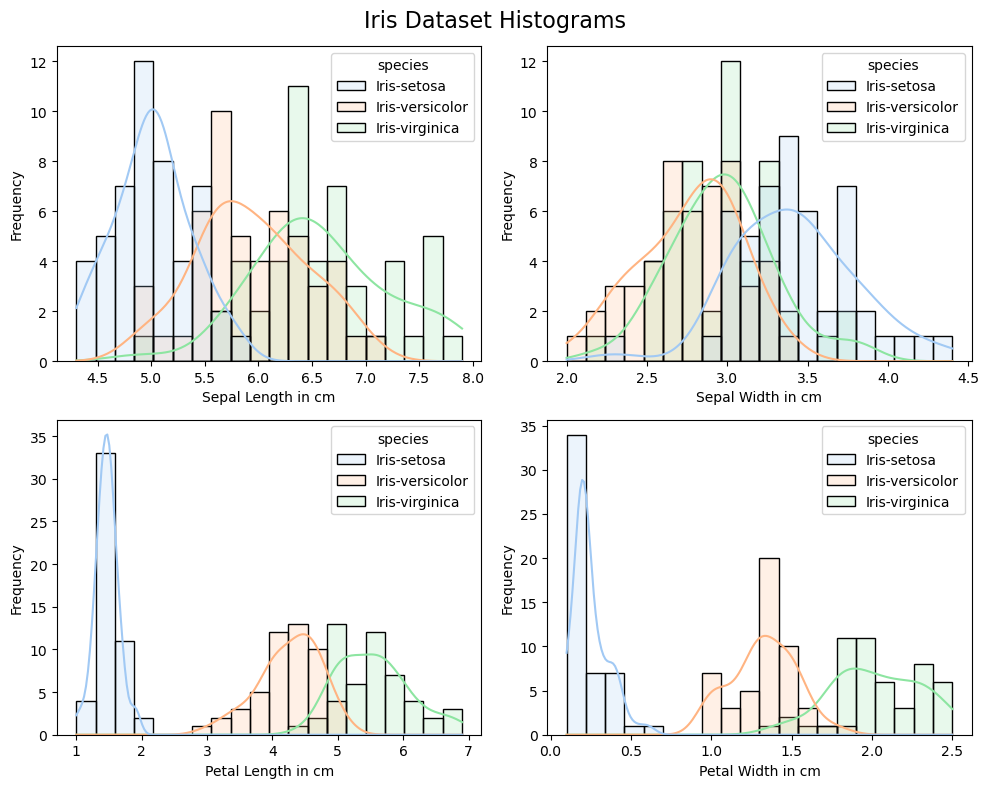

0

In [6]:
an.generate_histograms_combined(an.config, to_console=True)

## Plot Scatterplot of the data
This will display the scatterplot in the notebook and also save it to a file.
of the code. 

There is a distinct relationship between petal length and petal width , as well as the species. This may imply that only one of the features needs to be used , or possible the width and length of the petal can be comined ( approximate servace area , either assume a rectangle or ellipse) to create a new feature. The formulae for a elipse is pi * a * b where a and b are the semi major and minor axes. The formulae for a rectangle is a * b (https://www.cuemath.com/geometry/area-of-an-ellipse/) and alternative is the circumference of a circle ( pi * sqrt(2[a**2+b**2]) (https://www.cuemath.com/measurement/perimeter-of-ellipse/)

References:
- [Seaborn Scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) 

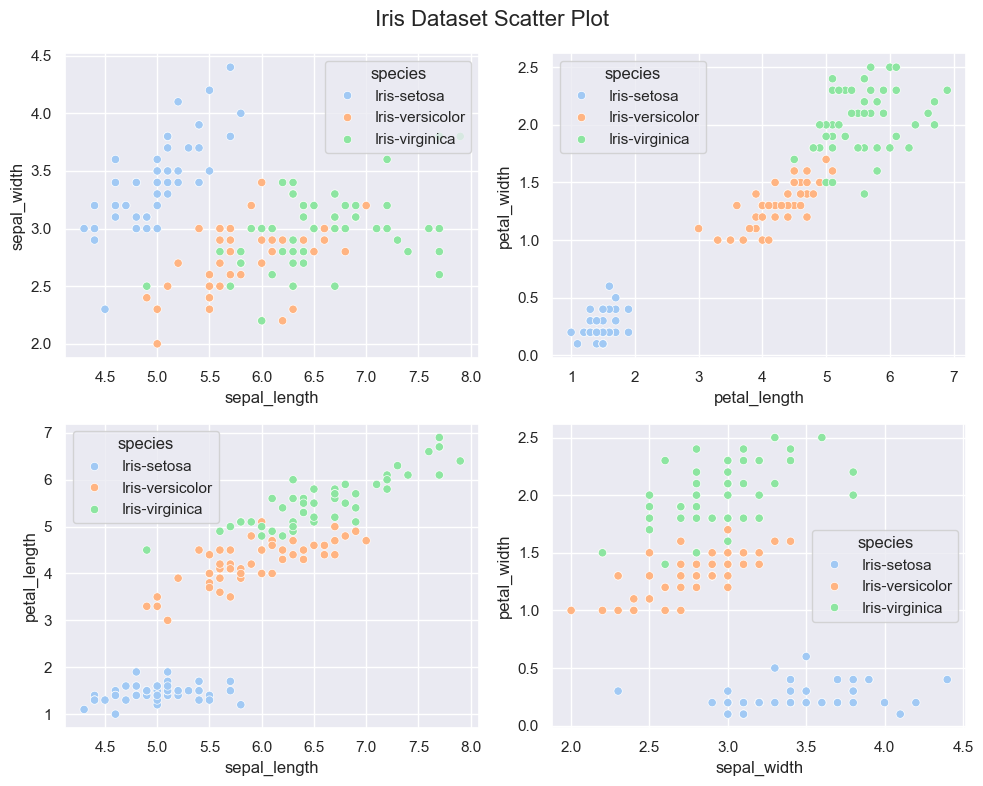

0

In [13]:
an.generate_scatter_plot(an.config, to_console=True)

In [ ]:

lines = inspect.getsource(an.generate_scatter_plot)
print(lines)

def generate_scatter_plot(config,to_console = False):
    """
    Generates a scatter plot of the Iris dataset based on the provided configuration.

    Parameters:
    config (dict): A dictionary containing the configuration for the plot. 
                   It must include the following keys:
                   - 'df': A pandas DataFrame containing the Iris dataset.
                   - 'target_scatter': The file path where the scatter plot will be saved.
    to_console (bool): If True, the scatter plot will be displayed in the console. 
                       Default is False.

    Returns:
    int: Returns 0 if the scatter plot is generated successfully, 
         -1 if the DataFrame is not found in the config.

    Raises:
    FileNotFoundError: If the target scatter plot file path is invalid.
    """
    logging.info("Generating scatter plot")
    # Generate a scatter plot of the data
    # check if the dataframe is empty
    filename = f"{config['target_path']}/{config['target_s

## Plot Boxplot of the data
This will display the boxplot in the notebook and also save it to a file.

The box plot shows the summary metrics in a diagram , so that the data can be easily visualised. 

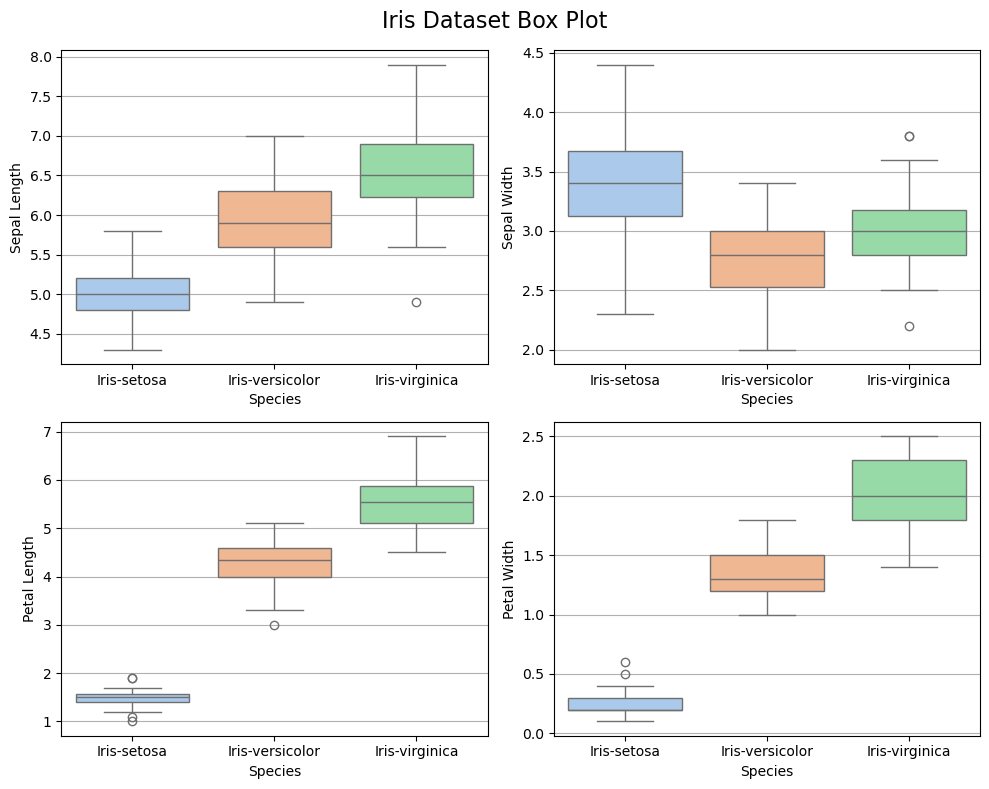

0

In [8]:
an.generate_box_plot(an.config, to_console=True)

## Summary data in table form ##

This will display the summary data in the notebook. What this shows is the summary metrics for the species and features. ALthough interesting the box plot above and below shows the same summary data in a more visual way. The data values have been rounded to 2 decimal places for ease of reading.

In [9]:
print(an.config['df_summary'])

            species       feature  Mean  Min  Max   Std  Median   Q25   Q75
0       Iris-setosa  petal_length  1.46  1.0  1.9  0.17    1.50  1.40  1.58
1       Iris-setosa   petal_width  0.24  0.1  0.6  0.11    0.20  0.20  0.30
2       Iris-setosa  sepal_length  5.01  4.3  5.8  0.35    5.00  4.80  5.20
3       Iris-setosa   sepal_width  3.42  2.3  4.4  0.38    3.40  3.12  3.68
4   Iris-versicolor  petal_length  4.26  3.0  5.1  0.47    4.35  4.00  4.60
5   Iris-versicolor   petal_width  1.33  1.0  1.8  0.20    1.30  1.20  1.50
6   Iris-versicolor  sepal_length  5.94  4.9  7.0  0.52    5.90  5.60  6.30
7   Iris-versicolor   sepal_width  2.77  2.0  3.4  0.31    2.80  2.52  3.00
8    Iris-virginica  petal_length  5.55  4.5  6.9  0.55    5.55  5.10  5.88
9    Iris-virginica   petal_width  2.03  1.4  2.5  0.27    2.00  1.80  2.30
10   Iris-virginica  sepal_length  6.59  4.9  7.9  0.64    6.50  6.22  6.90
11   Iris-virginica   sepal_width  2.97  2.2  3.8  0.32    3.00  2.80  3.18


## Box Plot of iris data set - Common X axis
This will display the boxplot in the notebook and also save it to a file.
This is a box plot , similar to the above for each species of iris and feature with a common x axis . This makes it easier to proportianly compare the species and features.

The species setosa stands out as distinct from the other two species , with respect to the petal length and petal width , there is also seperation for the other two species but it is less distinct . There is cross over between the two species , especially with respect to outliers.

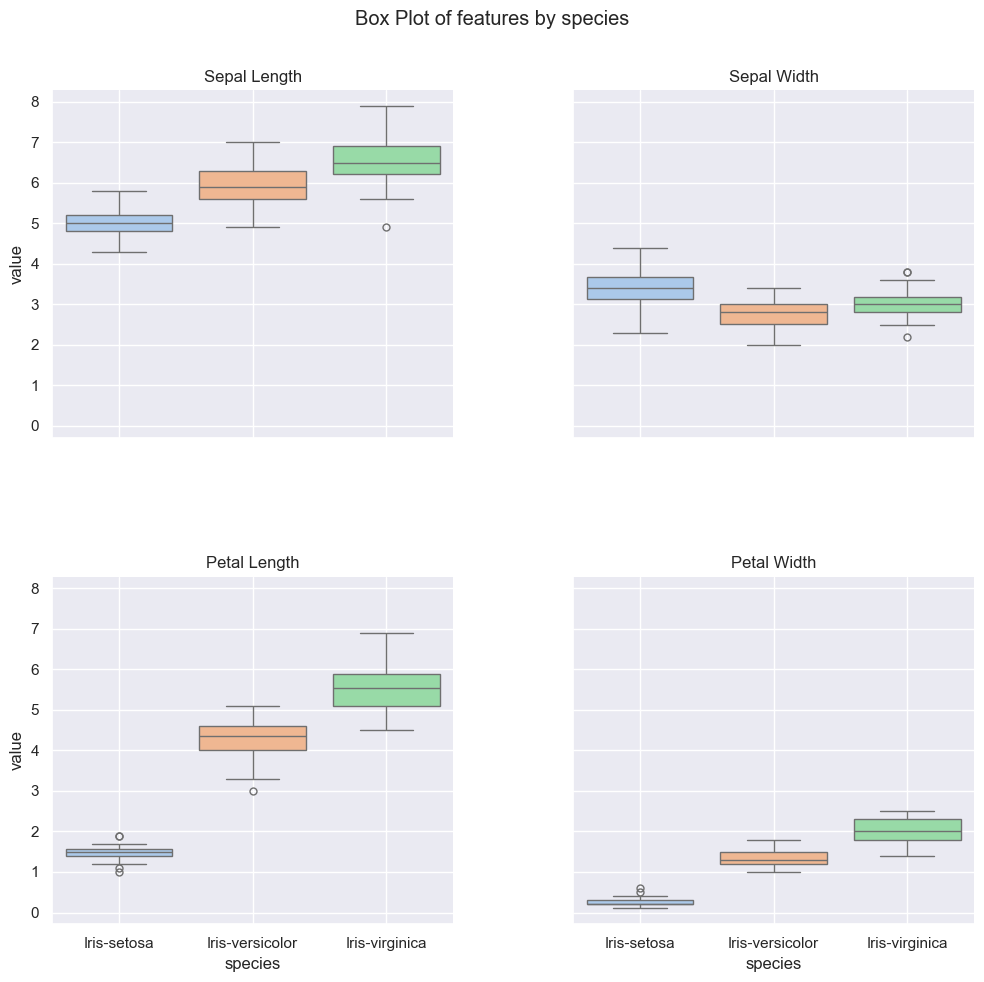

Box plot I generated successfully


In [10]:
return_code = an.generate_box_plot_II(an.config, to_console=True)
if return_code != 0:
    print(f"Error generating box plot I : {return_code}")
else:
    print("Box plot I generated successfully")


## Violin Plot of iris data set - Common X axis
This will display the violin plot in the notebook and also save it to a file.  


A violin plot plays a similar role as a box-and-whisker plot. It shows the distribution of data points after grouping by one (or more) variables. Unlike a box plot, each violin is drawn using a kernel density estimate of the underlying distribution. The width of the violin indicates the "density" of the points at different values. The fatter the more points are there .

- https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot
- Google Gemini - What is a violin Plot


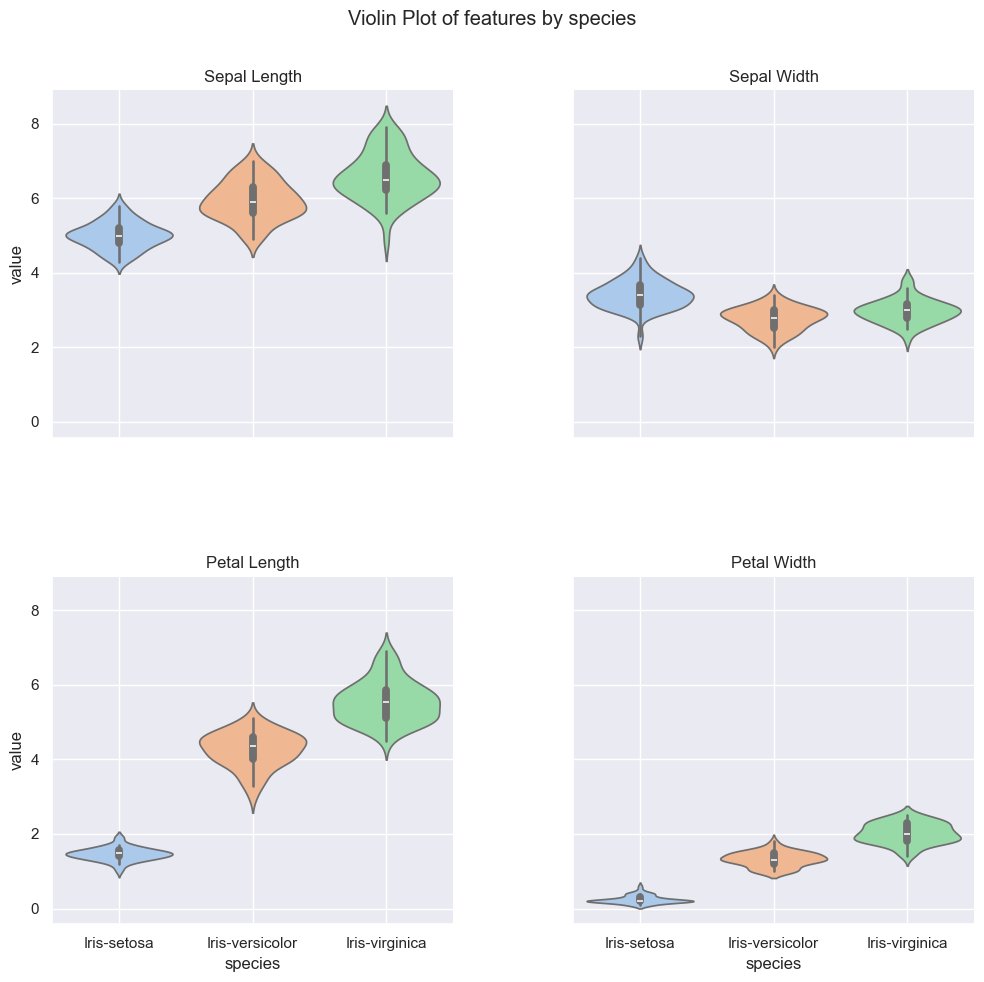

Box plot I generated successfully


In [11]:
return_code = an.generate_box_plot_II(an.config, to_console=True,kind='violin')
if return_code != 0:
    print(f"Error generating box plot I : {return_code}")
else:
    print("Box plot I generated successfully")


## Boxen Plot of iris data set - Common X axis
This will display the boxen plot in the notebook and also save it to a file.
This is a boxen plot , similar to the above for each species of iris and feature with a common x axis . This makes it easier to proportianly compare the species and features.

The boxen plot shows more quantiles and the tails. Shows the outliers in more detail. It is supposed to be for large data sets. The iris data set may be too small for this plot to be useful.  

It does show that generally there is separation between the species for the petal length and width. The outliers show there is overlap between species. The outliers are potentially identified as different species if some catagosing alogorithm was used.

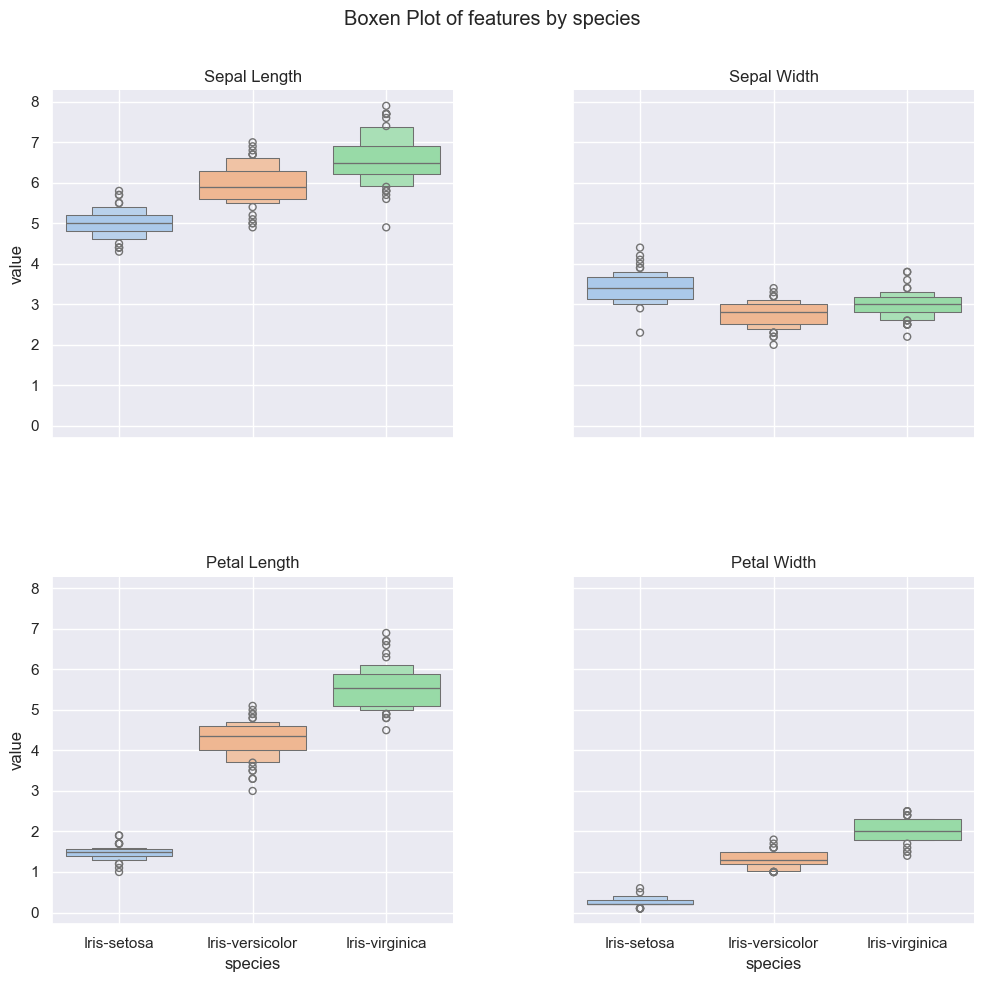

Box plot I generated successfully


In [12]:
return_code = an.generate_box_plot_II(an.config, to_console=True,kind='boxen')
if return_code != 0:
    print(f"Error generating box plot I : {return_code}")
else:
    print("Box plot I generated successfully")